<a href="https://colab.research.google.com/github/sharifashik591/HandDigit-recognition-with_DeepLearning/blob/main/HandDigit_with_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Digit recognition using MNIST  Dataset with deep learning**

**Import Dependences**

In [ ]:
# pip install seaborn_image

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn_image as simg


#For model

import tensorflow as tf
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

**Load Dataset**

In [ ]:
mnist=tf.keras.datasets.mnist
data=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#split dataset
(x_train, y_train),(x_test, y_test)=data

**Data Visulization**

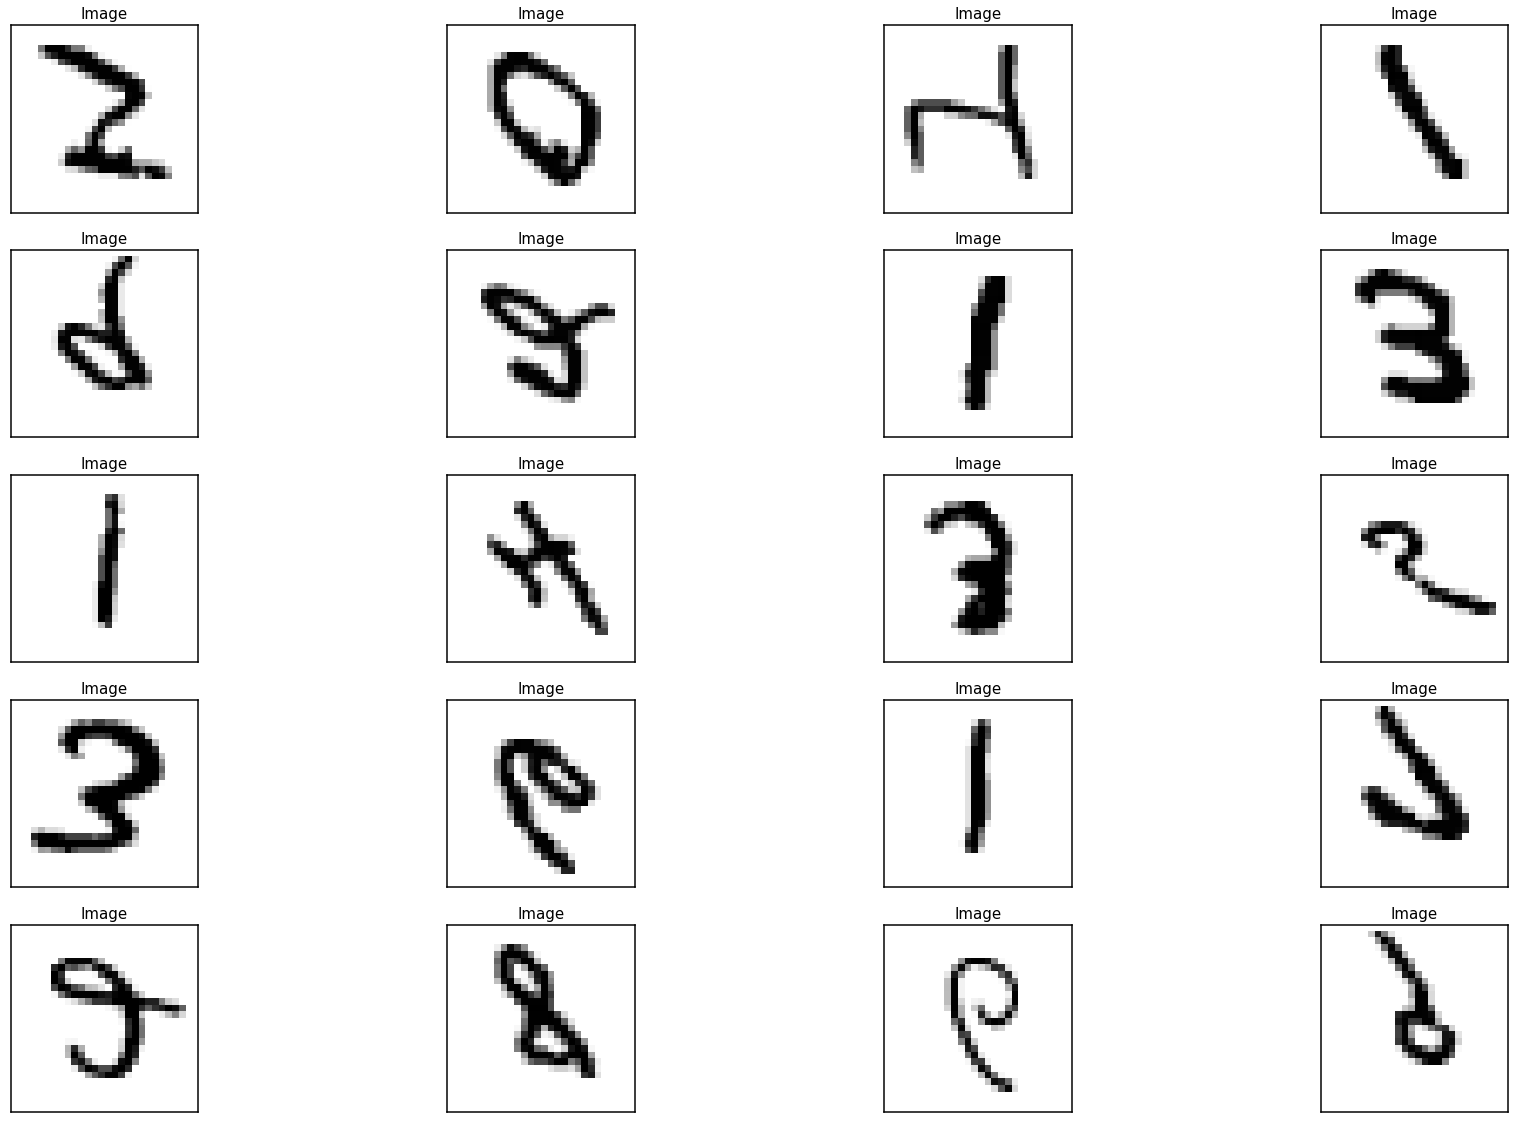

In [ ]:
fig = plt.figure(figsize=(30,20)) # make figure

for i in range(20):
    ax=fig.add_subplot(5,4, i+1) #make subPlot
    ax.set_title('Image',)
    simg.imgplot(x_train[i],cmap='binary',alpha=1,ax=ax,cbar=False)
plt.show()

Normalize dataset

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

**Build DNN model**

In [ ]:
model=Sequential()
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2581 - accuracy: 0.9249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1075 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0732 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0259 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0205 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0176 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Now Test my model

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.9756


In [43]:
print(val_acc)
print(val_loss)

0.975600004196167
0.11165463924407959


My model accuracy around 98%

In [ ]:
pred=model.predict(x_test)

Now predction test

In [ ]:
value=np.argmax(pred[30]) #maximam value from predction

print('My model predict 30 positions value is '+ str(value) +'. Now I will see what was the test value from this position in test dataset')

My model predict 30 positions value is 3. Now I will see what was the test value from this position in test dataset


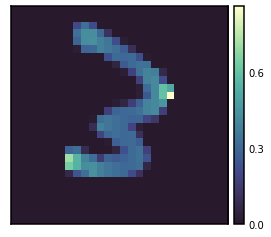

In [ ]:
simg.imgplot(x_test[30])

**My model Predict exact same result**